In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# 문제01 
from sklearn.metrics import confusion_matrix

In [3]:
# 문제02
churn_df = pd.read_csv("data/8_customer_churn.csv")
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure_months     2431 non-null   float64
 1   contract_type     2401 non-null   object 
 2   payment_method    2440 non-null   object 
 3   internet_service  2439 non-null   object 
 4   monthly_charge    2422 non-null   float64
 5   total_charges     2425 non-null   float64
 6   data_usage_gb     2424 non-null   float64
 7   support_calls     2430 non-null   float64
 8   addon_services    2418 non-null   float64
 9   churn             2500 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 195.4+ KB


In [5]:
churn_df

,tenure_months,contract_type,payment_method,internet_service,monthly_charge,total_charges,data_usage_gb,support_calls,addon_services,churn
0,32.0,2년,신용카드,기가,124253.0,4355946.0,123.0,0.0,0.0,0
1,45.0,무약정,지류,광랜,35326.0,1372634.0,125.0,0.0,5.0,0
2,40.0,무약정,지류,기가,128300.0,5179948.0,371.0,7.0,0.0,1
3,59.0,2년,신용카드,광랜,20723.0,1242669.0,158.0,5.0,3.0,0
4,46.0,1년,신용카드,기가,89569.0,3572681.0,371.0,3.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...
2495,4.0,무약정,지류,미사용,93311.0,314361.0,493.0,7.0,2.0,1
2496,44.0,2년,자동이체,광랜,95144.0,3418384.0,32.0,10.0,3.0,1
2497,21.0,2년,신용카드,미사용,80341.0,1510076.0,418.0,8.0,4.0,1
2498,20.0,1년,신용카드,광랜,37241.0,747309.0,449.0,6.0,4.0,1


<Axes: xlabel='monthly_charge', ylabel='Count'>

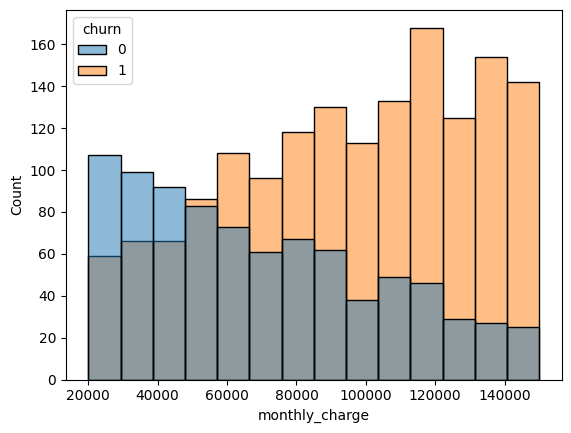

In [6]:
# 문제03
sns.histplot(data=churn_df, x='monthly_charge', hue='churn')

In [7]:
import platform
from matplotlib import rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='contract_type', ylabel='count'>

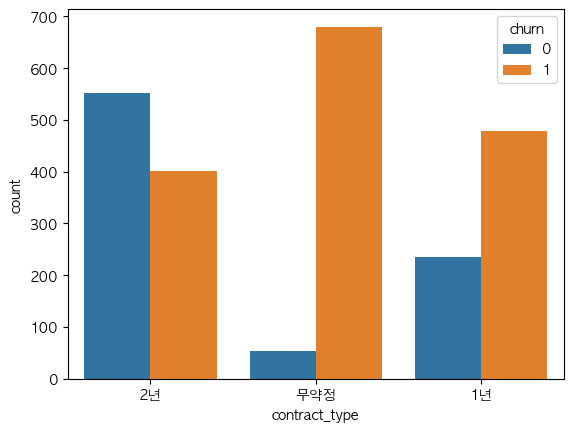

In [8]:
# 문제04
sns.countplot(data=churn_df, x='contract_type', hue='churn')

In [10]:
# 문제05
churn_df.groupby('churn')[['tenure_months','monthly_charge','support_calls']].mean()

,tenure_months,monthly_charge,support_calls
churn,,,
0,49.775701,69501.740093,3.831579
1,29.706032,94936.251279,5.574603


In [15]:
# 문제06
churn_pre = churn_df.copy()

churn_pre['total_charges'] = pd.to_numeric(churn_pre['total_charges'], errors='coerce')
total_charges_mean = churn_pre['total_charges'].median()
churn_pre['total_charges'].fillna(total_charges_mean, inplace=True)

churn_pre.fillna(0, inplace=True)
churn_pre.isnull().sum()

tenure_months       0
contract_type       0
payment_method      0
internet_service    0
monthly_charge      0
total_charges       0
data_usage_gb       0
support_calls       0
addon_services      0
churn               0
dtype: int64

In [18]:
# 문제07
churn_pre['contract_type'] = churn_pre['contract_type'].replace({'무약정':0,'1년':1,'2년':2})
churn_pre

,tenure_months,contract_type,payment_method,internet_service,monthly_charge,total_charges,data_usage_gb,support_calls,addon_services,churn
0,32.0,2,신용카드,기가,124253.0,4355946.0,123.0,0.0,0.0,0
1,45.0,0,지류,광랜,35326.0,1372634.0,125.0,0.0,5.0,0
2,40.0,0,지류,기가,128300.0,5179948.0,371.0,7.0,0.0,1
3,59.0,2,신용카드,광랜,20723.0,1242669.0,158.0,5.0,3.0,0
4,46.0,1,신용카드,기가,89569.0,3572681.0,371.0,3.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...
2495,4.0,0,지류,미사용,93311.0,314361.0,493.0,7.0,2.0,1
2496,44.0,2,자동이체,광랜,95144.0,3418384.0,32.0,10.0,3.0,1
2497,21.0,2,신용카드,미사용,80341.0,1510076.0,418.0,8.0,4.0,1
2498,20.0,1,신용카드,광랜,37241.0,747309.0,449.0,6.0,4.0,1


In [24]:
# 문제08
churn_encoded = pd.get_dummies(churn_pre, columns=['payment_method','internet_service'])

X = churn_encoded.drop(['churn'], axis=1)
y = churn_encoded['churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=2024, stratify=y)

In [25]:
# 문제09
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [28]:
# 문제10
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [29]:
# 문제11
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=2024)
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=6, random_state=2024)

In [33]:
model_rf.feature_importances_
importances_index = X.columns
most_important_index = np.argmax(model_rf.feature_importances_)
print(importances_index[most_important_index])

tenure_months


In [36]:
# 문제12
from sklearn.metrics import precision_score, recall_score

rf_pred = model_rf.predict(X_valid_scaled)
rf_ps = precision_score(rf_pred, y_valid)
rf_rs = recall_score(rf_pred, y_valid)
print(f"precision_score : {rf_ps:.4f}, recall_score : {rf_rs:.4f}")

precision_score : 0.9605, recall_score : 0.8457


In [39]:
# 문제13
model_dl = Sequential([
    Dense(16, activation='relu', input_shape=[X_train.shape[1]]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_dl.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_valid_scaled, y_valid),
    verbose=0
)

model_dl.evaluate(X_valid_scaled, y_valid)


20/20 [==============================] - 0s 650us/step - loss: 0.3066 - accuracy: 0.8784


[0.3065796494483948, 0.8784000277519226]

In [43]:
# 문제14
new_customer_data = np.array([[10, 100000, 1000000, 50.0, 5.0, 3.0, 0, 1, 2, 1, 0, 0, 0, 1, 0]])
scaled_new_customer_data = scaler.fit_transform(new_customer_data)
predicted_churn_prob = model_dl.predict(scaled_new_customer_data)
predicted_churn_prob[0][0]

1/1 [==============================] - 0s 14ms/step


0.5946268